In [1]:
import pandas as pd
from neuralprophet.neural_prophet import NeuralProphet as Bifrost

In [2]:
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')

# Seasonality

In [8]:
m = Bifrost(
    n_lags=0,
    seasonality_mode='additive',
    yearly_seasonality=8,
    weekly_seasonality=False,
    daily_seasonality=False,
    verbose=True
)
m.fit(df)

AttrDict({'t_start': Timestamp('2007-12-10 00:00:00'), 't_scale': Timedelta('2963 days 00:00:00'), 'y_shift': 8.138957937650906, 'y_scale': 0.8458113663030432})
AttrDict({'type': 'fourier', 'mode': 'additive', 'periods': OrderedDict([('yearly', AttrDict({'resolution': 8, 'period': 365.25, 'arg': 8}))])})
TimeNet(
  (season_params): ParameterDict(  (yearly): Parameter containing: [torch.FloatTensor of size 16])
)
model_complexity 3.9889840465642745
Tabularized inputs:
time shape:  (2905, 1)
yearly (2905, 1, 16)
1. Epoch Avg Loss:       0.27
2. Epoch Avg Loss:       0.20
3. Epoch Avg Loss:       0.19
4. Epoch Avg Loss:       0.20
5. Epoch Avg Loss:       0.20
6. Epoch Avg Loss:       0.19
7. Epoch Avg Loss:       0.19
8. Epoch Avg Loss:       0.20
9. Epoch Avg Loss:       0.21
10. Epoch Avg Loss:       0.20
11. Epoch Avg Loss:       0.19
12. Epoch Avg Loss:       0.20
13. Epoch Avg Loss:       0.19
14. Epoch Avg Loss:       0.19
15. Epoch Avg Loss:       0.19
16. Epoch Avg Loss:       0.

Tabularized inputs:
time shape:  (2965, 1)
yearly (2965, 1, 16)
             ds         y         t  y_scaled
0    2007-12-10  9.590761  0.000000  1.716462
1    2007-12-11  8.519590  0.000337  0.450020
2    2007-12-12  8.183677  0.000675  0.052871
3    2007-12-13  8.072467  0.001012 -0.078612
4    2007-12-14  7.893572  0.001350 -0.290119
...         ...       ...       ...       ...
2960 2016-03-16       NaN  1.018900       NaN
2961 2016-03-17       NaN  1.019237       NaN
2962 2016-03-18       NaN  1.019575       NaN
2963 2016-03-19       NaN  1.019912       NaN
2964 2016-03-20       NaN  1.020250       NaN

[2965 rows x 4 columns]
2965
Tabularized inputs:
time shape:  (2965, 1)
yearly (2965, 1, 16)
             ds         y         t  y_scaled
0    2007-12-10  9.590761  0.000000  1.716462
1    2007-12-11  8.519590  0.000337  0.450020
2    2007-12-12  8.183677  0.000675  0.052871
3    2007-12-13  8.072467  0.001012 -0.078612
4    2007-12-14  7.893572  0.001350 -0.290119
...         ..

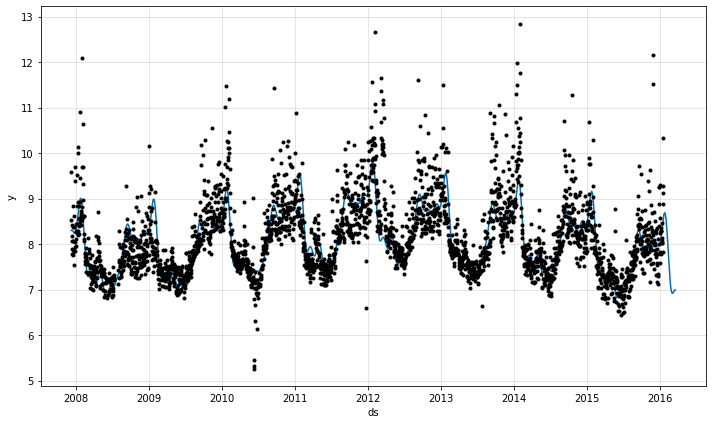

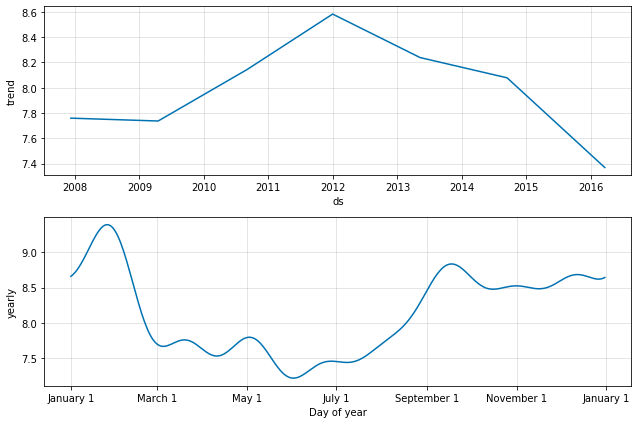

In [9]:
forecast = m.predict(future_periods=60, freq='D')
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Smooth: 1xregularized trend, 100 changepoints

In [5]:
m = Bifrost(
    n_changepoints=100,
    trend_smoothness=1,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


             ds         y         t  y_scaled
0    2007-12-10  9.590761  0.000000  1.716462
1    2007-12-11  8.519590  0.000337  0.450020
2    2007-12-12  8.183677  0.000675  0.052871
3    2007-12-13  8.072467  0.001012 -0.078612
4    2007-12-14  7.893572  0.001350 -0.290119
...         ...       ...       ...       ...
2960 2016-03-16       NaN  1.018900       NaN
2961 2016-03-17       NaN  1.019237       NaN
2962 2016-03-18       NaN  1.019575       NaN
2963 2016-03-19       NaN  1.019912       NaN
2964 2016-03-20       NaN  1.020250       NaN

[2965 rows x 4 columns]
2965
             ds         y         t  y_scaled
0    2007-12-10  9.590761  0.000000  1.716462
1    2007-12-11  8.519590  0.000337  0.450020
2    2007-12-12  8.183677  0.000675  0.052871
3    2007-12-13  8.072467  0.001012 -0.078612
4    2007-12-14  7.893572  0.001350 -0.290119
...         ...       ...       ...       ...
2960 2016-03-16       NaN  1.018900       NaN
2961 2016-03-17       NaN  1.019237       NaN
2962

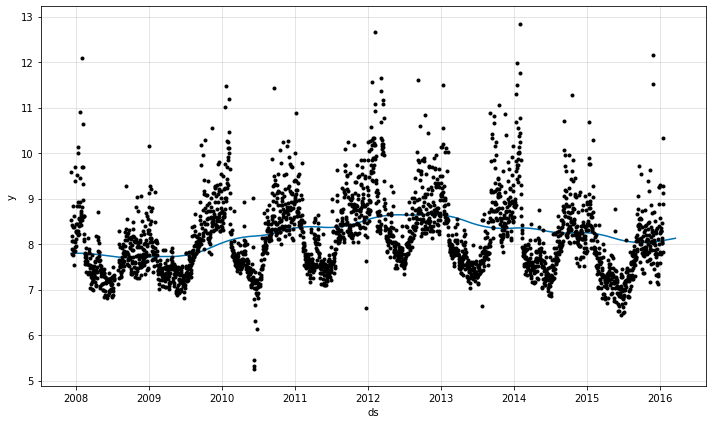

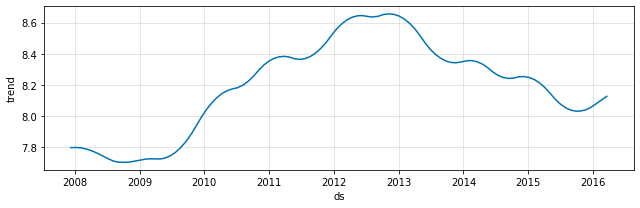

In [6]:
forecast = m.predict(future_periods=60, freq='D')
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Underfit: no changepoints

In [8]:
m = Bifrost(
    n_changepoints=0,
    trend_smoothness=0,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

             ds         y         t  y_scaled
0    2007-12-10  9.590761  0.000000  1.716462
1    2007-12-11  8.519590  0.000337  0.450020
2    2007-12-12  8.183677  0.000675  0.052871
3    2007-12-13  8.072467  0.001012 -0.078612
4    2007-12-14  7.893572  0.001350 -0.290119
...         ...       ...       ...       ...
2960 2016-03-16       NaN  1.018900       NaN
2961 2016-03-17       NaN  1.019237       NaN
2962 2016-03-18       NaN  1.019575       NaN
2963 2016-03-19       NaN  1.019912       NaN
2964 2016-03-20       NaN  1.020250       NaN

[2965 rows x 4 columns]
2965
             ds         y         t  y_scaled
0    2007-12-10  9.590761  0.000000  1.716462
1    2007-12-11  8.519590  0.000337  0.450020
2    2007-12-12  8.183677  0.000675  0.052871
3    2007-12-13  8.072467  0.001012 -0.078612
4    2007-12-14  7.893572  0.001350 -0.290119
...         ...       ...       ...       ...
2960 2016-03-16       NaN  1.018900       NaN
2961 2016-03-17       NaN  1.019237       NaN
2962

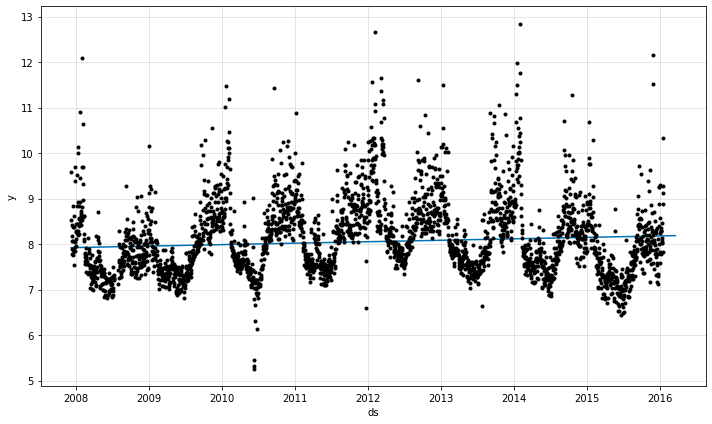

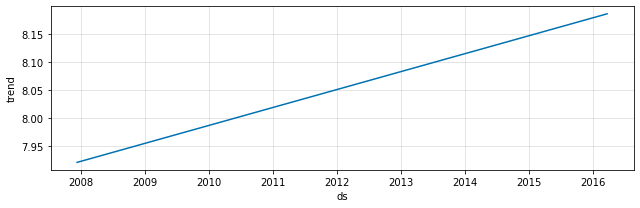

In [9]:
forecast = m.predict(future_periods=60, freq='D')
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Smooth Underfit: 1000xregularized trend, 1000 changepoints

In [10]:
m = Bifrost(
    n_changepoints=1000,
    trend_smoothness=1000,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


             ds         y         t  y_scaled
0    2007-12-10  9.590761  0.000000  1.716462
1    2007-12-11  8.519590  0.000337  0.450020
2    2007-12-12  8.183677  0.000675  0.052871
3    2007-12-13  8.072467  0.001012 -0.078612
4    2007-12-14  7.893572  0.001350 -0.290119
...         ...       ...       ...       ...
2960 2016-03-16       NaN  1.018900       NaN
2961 2016-03-17       NaN  1.019237       NaN
2962 2016-03-18       NaN  1.019575       NaN
2963 2016-03-19       NaN  1.019912       NaN
2964 2016-03-20       NaN  1.020250       NaN

[2965 rows x 4 columns]
2965
             ds         y         t  y_scaled
0    2007-12-10  9.590761  0.000000  1.716462
1    2007-12-11  8.519590  0.000337  0.450020
2    2007-12-12  8.183677  0.000675  0.052871
3    2007-12-13  8.072467  0.001012 -0.078612
4    2007-12-14  7.893572  0.001350 -0.290119
...         ...       ...       ...       ...
2960 2016-03-16       NaN  1.018900       NaN
2961 2016-03-17       NaN  1.019237       NaN
2962

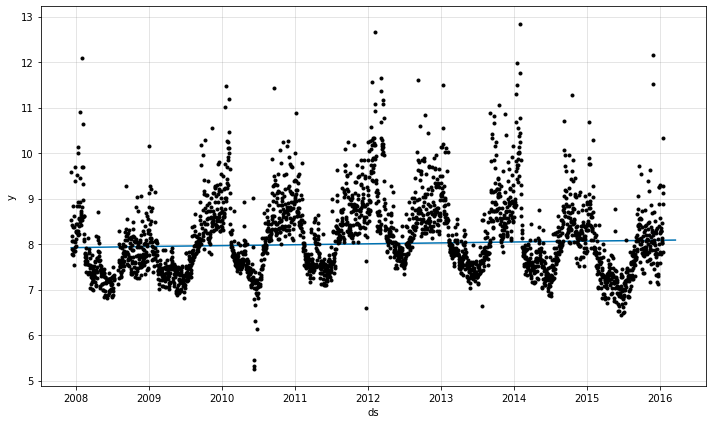

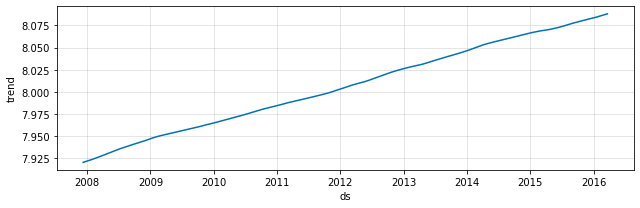

In [11]:
forecast = m.predict(future_periods=60, freq='D')
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Overfit: Direct gradient, 100 changepoints

In [12]:
m = Bifrost(
    n_changepoints=100,
    trend_smoothness=0,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

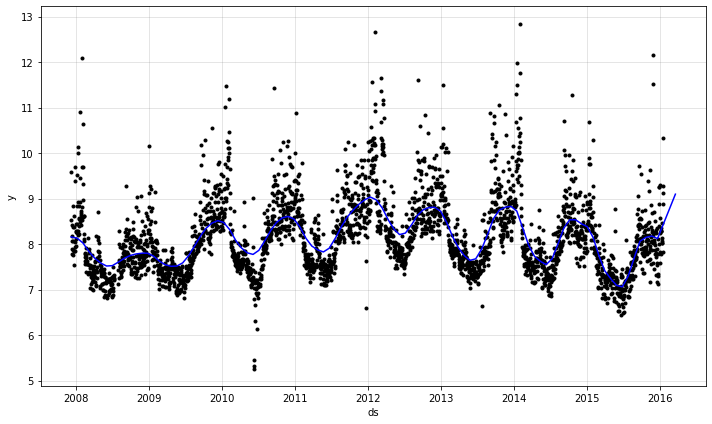

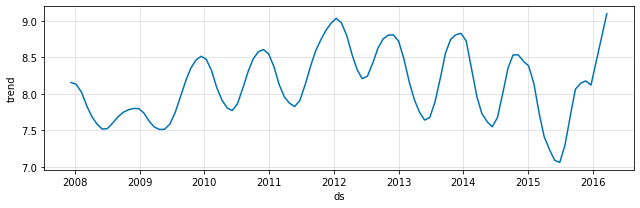

In [12]:
forecast = m.predict(future_periods=60, freq='D')
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Overfit: Direct gradient, discontinuous trend, 100 changepoints

In [13]:
m = Bifrost(
    n_changepoints=100,
    trend_smoothness=-1,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

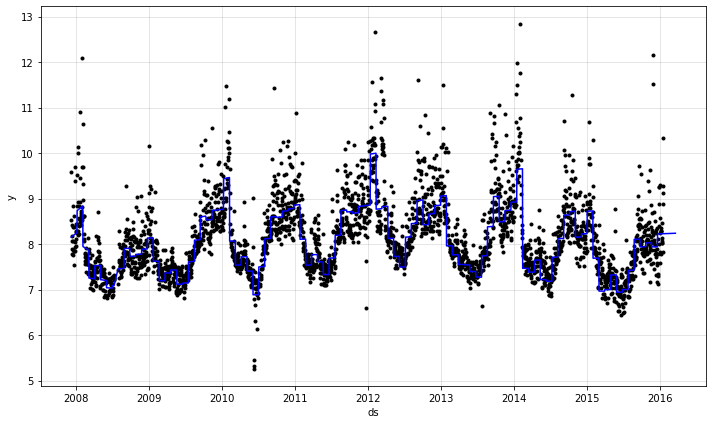

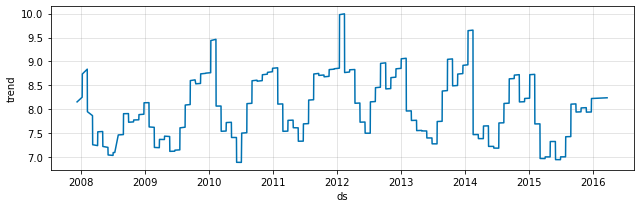

In [14]:
forecast = m.predict(future_periods=60, freq='D')
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)

## Smooth overfit: 0.001xregularized trend, 1000 changepoints

In [15]:
m = Bifrost(
    n_changepoints=1000,
    trend_smoothness=0.001,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)
m.fit(df)

NOTICE: A numeric value greater than 0 for continuous_trend is interpreted asthe trend changepoint regularization strength. Please note that this feature is experimental.


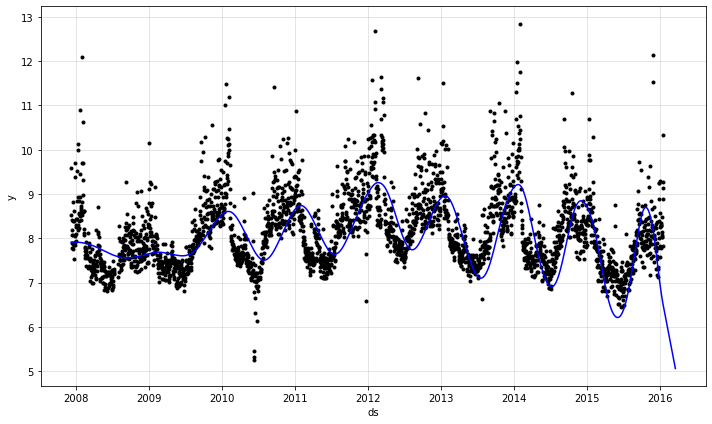

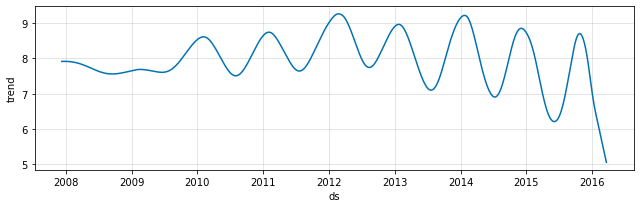

In [16]:
forecast = m.predict(future_periods=60, freq='D')
fig_fit = m.plot(forecast)
fig_trend = m.plot_components(forecast)